Author: Evan Yip <br>
Purpose: To investigate data quality issues for responses in DOSPERT and Risk questions <br>
Method: Compare the responses of low variance participants to average response values.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [5]:
df = pd.read_csv('../data/RiskFinal_DATA_2024-02-05_0017_combined.csv')

In [7]:
risk_cols = ['exer_50improv_1drop', 'exer_50improv_10drop', 'exer_50improv_50drop',
       'exer_50improv_90drop', 'att_check_1', 'exer_90improv_1drop',
       'exer_90improv_10drop', 'exer_90improv_50drop', 'exer_90improv_90drop',
       'exer_50pain_1death', 'exer_50pain_10death', 'exer_50pain_50death',
       'exer_90pain_1death', 'exer_90pain_10death', 'exer_90pain_50death',
       'work_50improv_1drop', 'work_50improv_10drop', 'work_50improv_50drop',
       'work_50improv_90drop', 'work_90improv_1drop', 'work_90improv_10drop',
       'work_90improv_50drop', 'work_50improv_1para', 'work_50improv_10para',
       'work_50improv_50para', 'work_50improv_90para', 'work_90improv_1para',
       'work_90improv_10para']
dospert_cols = ['dospert1',
       'dospert2', 'dospert3', 'dospert4', 'dospert5', 'dospert6', 'dospert7',
       'dospert8', 'dospert9', 'dospert10', 'dospert11', 'dospert12',
       'dospert13', 'dospert14', 'dospert15', 'dospert16', 'dospert17',
       'dospert18', 'dospert19', 'dospert20', 'dospert21', 'dospert22',
       'dospert23', 'dospert24', 'dospert25', 'dospert26', 'dospert27',
       'dospert28', 'dospert29', 'dospert30']

In [10]:
# Computing the variances
dospert_variance = df[dospert_cols].std(axis=1) ** 2 
risk_variance = df[risk_cols].std(axis=1) ** 2 

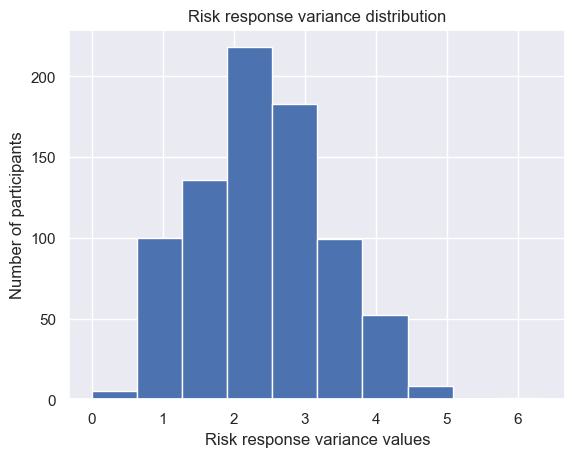

In [144]:
plt.hist(risk_variance)
plt.title('Risk response variance distribution')
plt.xlabel('Risk response variance values')
plt.ylabel('Number of participants')
plt.show()

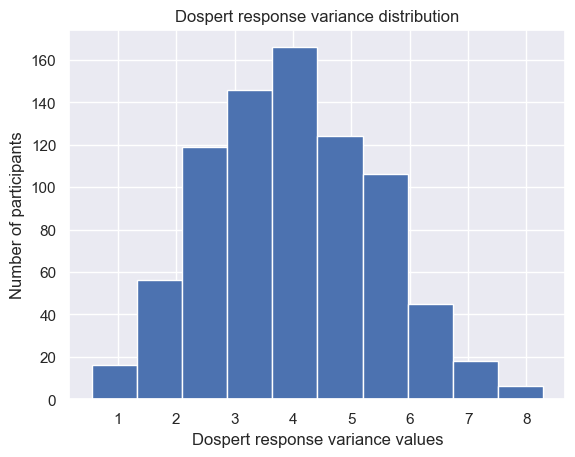

In [143]:
plt.hist(dospert_variance)
plt.title('Dospert response variance distribution')
plt.xlabel('Dospert response variance values')
plt.ylabel('Number of participants')
plt.show()

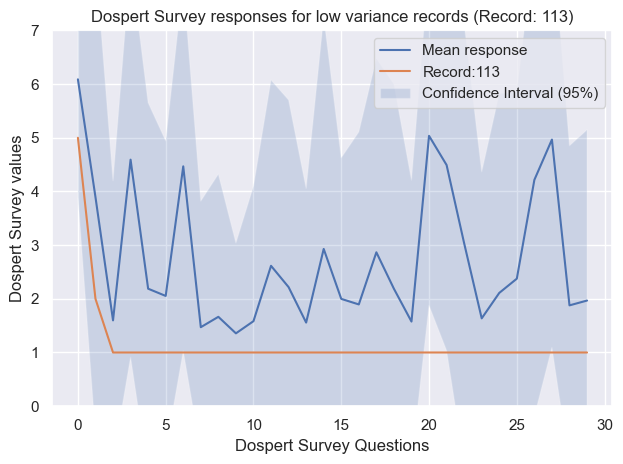

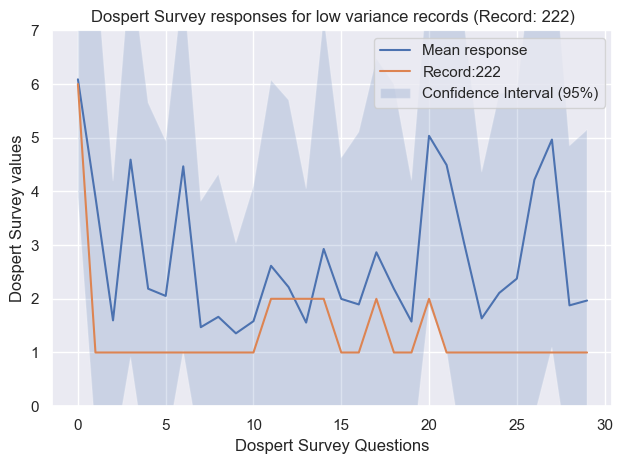

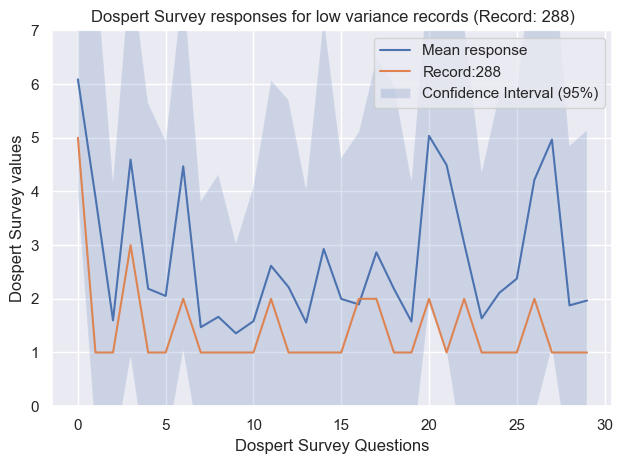

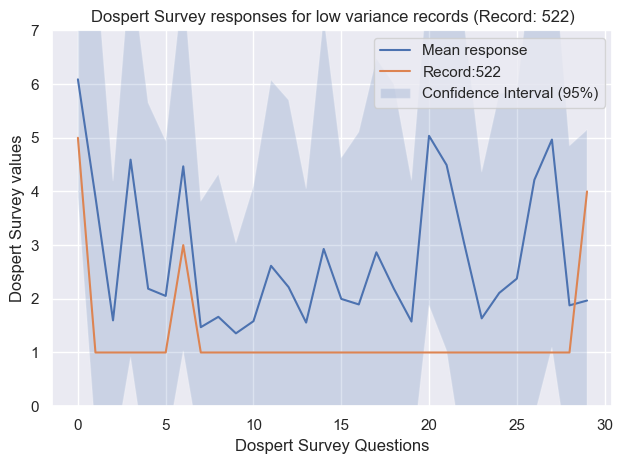

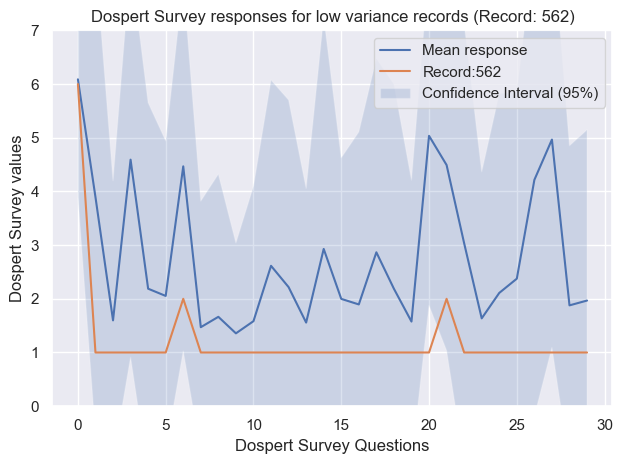

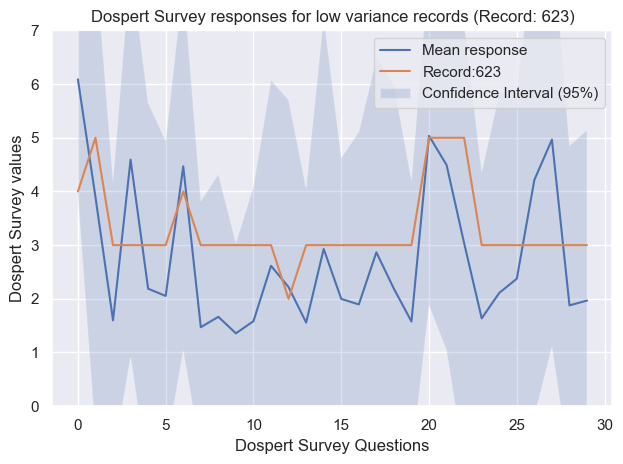

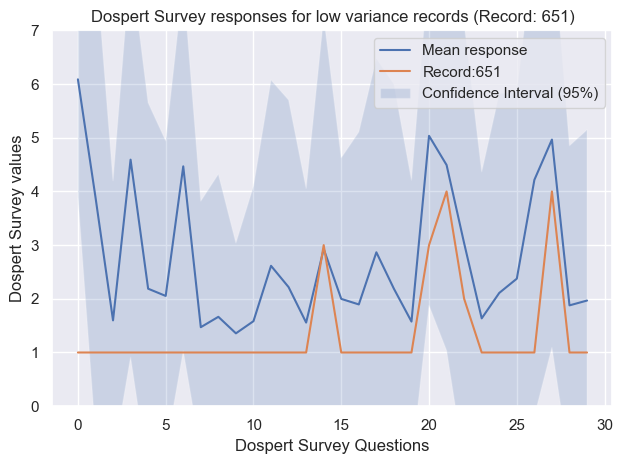

In [142]:
variance_cutoff = 1
low_variance_dospert = df[dospert_variance < variance_cutoff][dospert_cols].reset_index()

means = df[dospert_cols].mean().to_numpy()
upper_bounds = means + df[dospert_cols].std(axis=0).to_numpy() * 2
lower_bounds = means - df[dospert_cols].std(axis=0).to_numpy() * 2

agg_df = pd.DataFrame({'means': means, 'upper_bound': upper_bounds, 'lower_bound': lower_bounds})

for record in range(low_variance_dospert.shape[0]):
    plt.figure()
    xvals = np.arange(0, low_variance_dospert.shape[1] - 1, 1)
    record_label = low_variance_dospert.iloc[record, 0]
    plt.plot(agg_df['means'], label='Mean response')
    plt.plot(xvals, low_variance_dospert.iloc[record, 1:], label='Record:' + str(record_label))
    plt.fill_between(xvals, agg_df['lower_bound'], agg_df['upper_bound'], alpha=0.2, label='Confidence Interval (95%)')
    plt.title(f'Dospert Survey responses for low variance records (Record: {record_label})')
    plt.ylim(bottom=0, top=7)
    plt.xlabel('Dospert Survey Questions')
    plt.ylabel('Dospert Survey values')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'../figures/low_variance_plots/low_variance_dospert_question_responses_{record}')

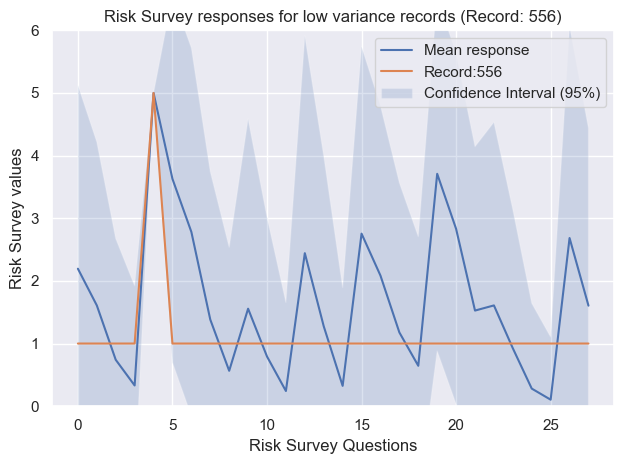

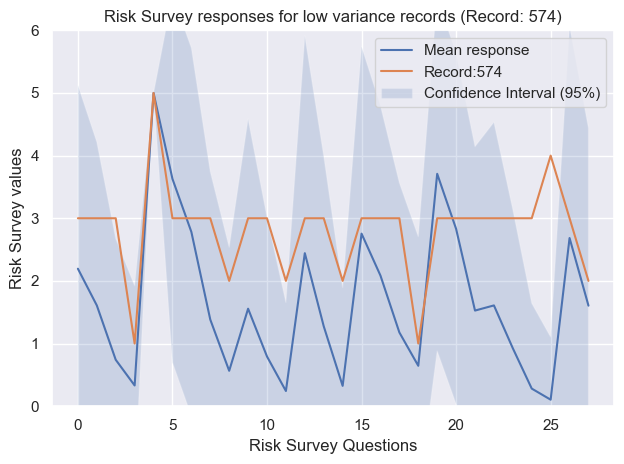

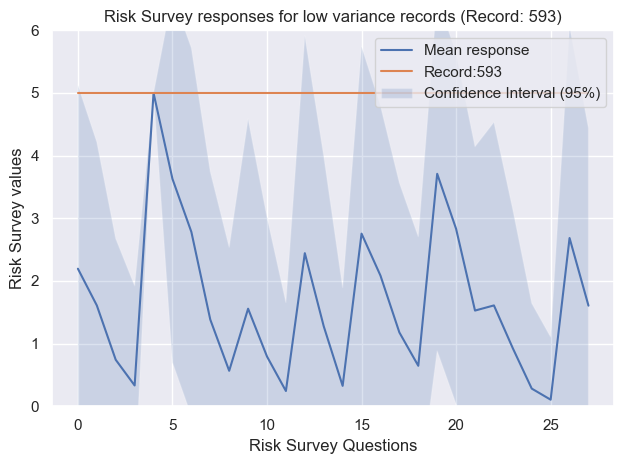

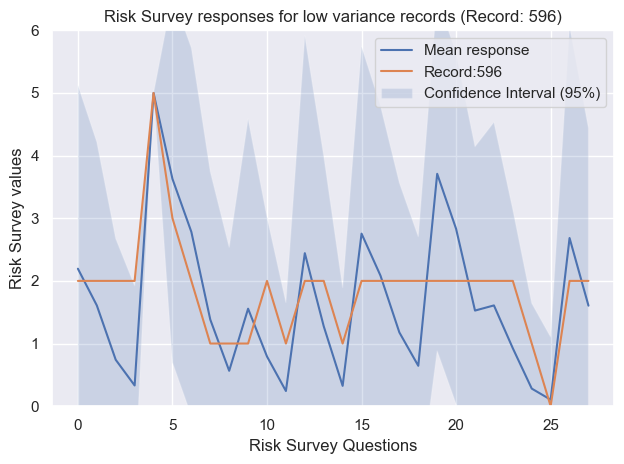

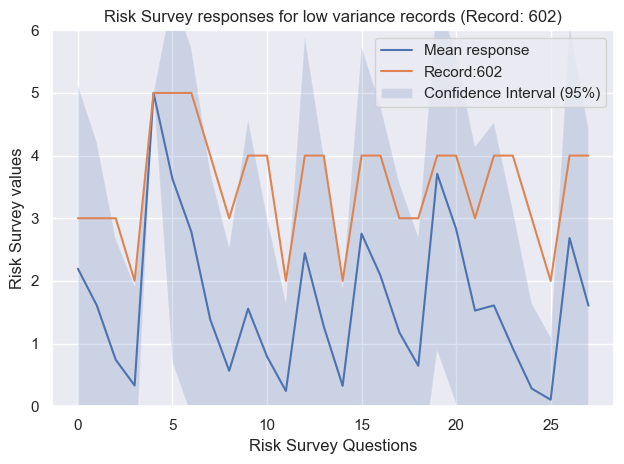

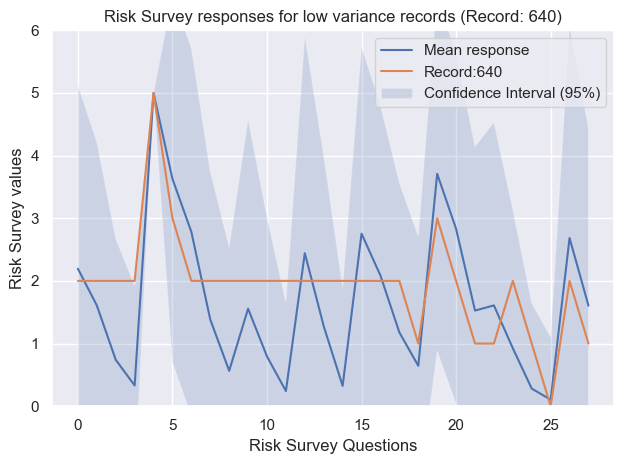

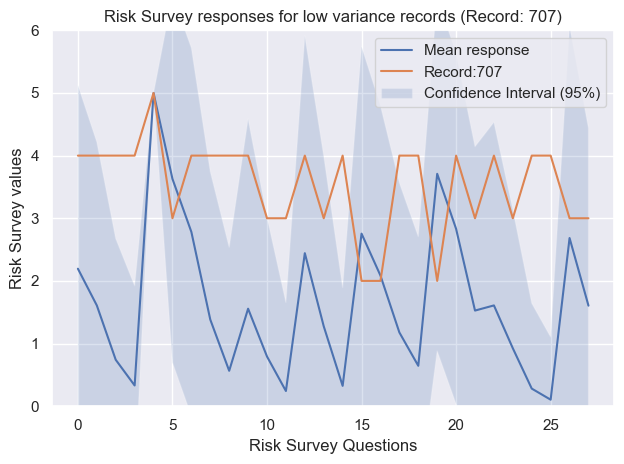

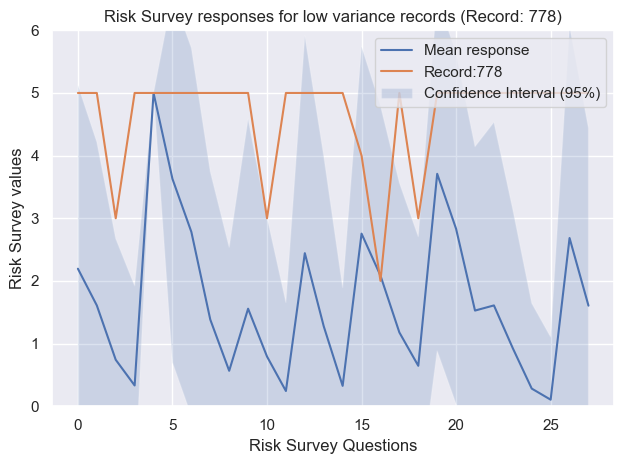

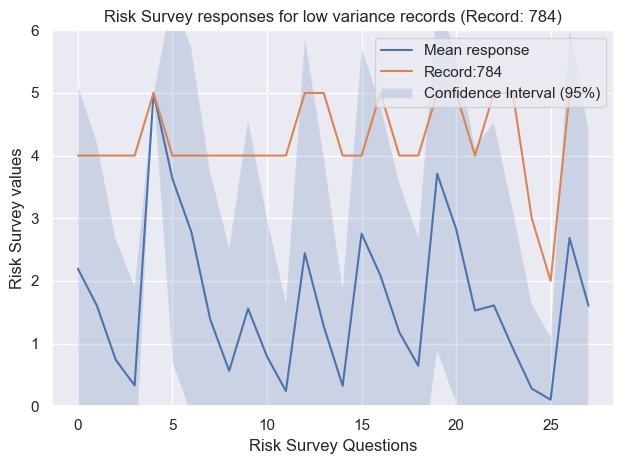

In [136]:
variance_cutoff = 0.8
low_variance_risk = df[risk_variance < variance_cutoff][risk_cols].reset_index()

means = df[risk_cols].mean().to_numpy()
upper_bounds = means + df[risk_cols].std(axis=0).to_numpy() * 2
lower_bounds = means - df[risk_cols].std(axis=0).to_numpy() * 2

agg_df = pd.DataFrame({'means': means, 'upper_bound': upper_bounds, 'lower_bound': lower_bounds})

for record in range(low_variance_risk.shape[0]):
    plt.figure()
    xvals = np.arange(0, low_variance_risk.shape[1] - 1, 1)
    record_label = low_variance_risk.iloc[record, 0]
    plt.plot(agg_df['means'], label='Mean response')
    plt.plot(xvals, low_variance_risk.iloc[record, 1:], label='Record:' + str(record_label))
    plt.fill_between(xvals, agg_df['lower_bound'], agg_df['upper_bound'], alpha=0.2, label='Confidence Interval (95%)')
    plt.title(f'Risk Survey responses for low variance records (Record: {record_label})')
    plt.ylim(bottom=0, top=6)
    plt.xlabel('Risk Survey Questions')
    plt.ylabel('Risk Survey values')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(f'../figures/low_variance_plots/low_variance_risk_question_responses_{record}')

In [145]:
import json